In [1]:
from lsa import *
import matplotlib.pyplot as plt
import csv
import os
import json

In [2]:
data_dir = 'data'

In [3]:
data_files = [os.path.join(data_dir, f) for f in DATA_FILES]

In [4]:
df_data = load_data(data_files)

In [5]:
df_data

,title,author,url,content,id,publication
0,It’s Possible to Hack a Phone With Sound Waves...,John Markoff,NaN,SAN FRANCISCO — A security loophole that wo...,19284,New York Times
1,Politically Correct School Officials Reject ’G...,Tom Ciccotta,NaN,A report from The Baltimore Sun claims that Ba...,44077,Breitbart
2,"Clinton, Sanders use N.H. primary to frame lon...",Philip Rucker,https://web.archive.org/web/20160206013008/htt...,"CONCORD, N. H. — For the Democratic presi...",209714,Washington Post
3,The ambitious Democrat who can make Trump Univ...,Charles Gasparino,http://nypost.com/2016/03/08/the-ambitious-dem...,Add one more bizarre twist to the 2016 preside...,135930,New York Post
4,People Are Slamming Tribeca Film Festival For...,Susan Cheng,https://web.archive.org/web/20160325115729/htt...,Organizers for the upcoming 2016 Tribeca Film...,106460,Buzzfeed News
...,...,...,...,...,...,...
995,Autopsy shows Keith Lamont Scott had four guns...,Wesley Lowery,https://web.archive.org/web/20161013005231/htt...,Keith Lamont Scott was struck at least th...,215980,Washington Post
996,Scientists found bacteria inside rocks — here’...,The Cosmic Companion,https://thenextweb.com/syndication/2020/04/17/...,The discovery of bacteria inside rocks under t...,73470,The Next Web
997,"Little Richard, rock 'n' roll pioneer, has die...",NaN,https://www.cbsnews.com/news/little-richard-ro...,"Little Richard, one of the chief architects of...",73471,CBS NEWS
998,Silicon Valley’s favorite magician reimagines ...,Zachary Crockett,https://thehustle.co/silicon-valleys-favorite-...,"Daniel Chan has stumped billionaires, CEOs, a...",73472,The Hustle


In [6]:
df_words = preprocess_docs(df_data, use_lemmatizer=False, remove_numbers=False)
df_frequency = get_term_by_document_frequency(df_words)
df_reduced = reduce_terms(df_frequency, max_df=1, min_df=1, max_terms=0,
                          keep_less_freq=False)
df_tf_idf = get_tf_idf(df_reduced)

In [7]:
df_tf_idf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
symposium,0.015498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rather,0.010575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
softwar,0.020624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,0.004798,NaN,NaN,NaN,NaN,NaN,NaN,0.012414,NaN,NaN,...,NaN,NaN,0.007984,0.005272,NaN,NaN,0.005744,0.003207,NaN,NaN
kind,0.004347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002905,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
joni,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005841,NaN
hydrogen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.034053,NaN,NaN,0.009276,NaN,NaN,NaN
covid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017522,0.042276


In [8]:
values = df_tf_idf.fillna(0).to_numpy()

In [9]:
values

array([[0.01549778, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01057488, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02062427, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01752239,
        0.04227625],
       [0.        , 0.        , 0.        , ..., 0.        , 0.0058408 ,
        0.02113812]])

In [10]:
U, s_eigen, V = np.linalg.svd(values, full_matrices=False)

In [11]:
s_eigen

array([3.20515204e+00, 1.50203560e+00, 1.38854215e+00, 1.04741285e+00,
       9.27295366e-01, 8.11766832e-01, 7.52298213e-01, 7.17360172e-01,
       7.02257795e-01, 6.99377585e-01, 6.76997765e-01, 6.63513915e-01,
       6.59931481e-01, 6.46196717e-01, 6.36848607e-01, 6.30041063e-01,
       6.20738000e-01, 6.14542639e-01, 6.06574326e-01, 5.99194949e-01,
       5.88792979e-01, 5.86209647e-01, 5.85589407e-01, 5.82256893e-01,
       5.80383418e-01, 5.76157858e-01, 5.71917525e-01, 5.69896826e-01,
       5.68379860e-01, 5.66272058e-01, 5.58564803e-01, 5.55608574e-01,
       5.53933468e-01, 5.49212302e-01, 5.46730686e-01, 5.42543476e-01,
       5.40716430e-01, 5.38187160e-01, 5.37169510e-01, 5.33124750e-01,
       5.30142865e-01, 5.27391702e-01, 5.23794053e-01, 5.21097801e-01,
       5.16587879e-01, 5.12882662e-01, 5.11399635e-01, 5.08797291e-01,
       5.05496665e-01, 5.04179684e-01, 5.01843586e-01, 5.00325827e-01,
       4.99240943e-01, 4.97880221e-01, 4.96926563e-01, 4.95651817e-01,
      

In [12]:
s_eigen[0]

3.205152040611481

In [13]:
s_eigen_norm = [x / s_eigen[0] for x in s_eigen]

In [14]:
s_eigen_norm

[1.0,
 0.4686316233959295,
 0.4332219293040972,
 0.3267903788862623,
 0.2893140025770967,
 0.25326936818829215,
 0.2347152968038762,
 0.2238147092155192,
 0.2191028027702835,
 0.21820418385301482,
 0.21122173197748356,
 0.2070148020522659,
 0.2058970907890454,
 0.20161187631866814,
 0.19869528790780777,
 0.1965713498984893,
 0.19366881579160067,
 0.19173587758998278,
 0.18924978232171763,
 0.18694743391343477,
 0.18370204342163646,
 0.182896049574946,
 0.18270253626743066,
 0.18166279959656484,
 0.18107827992851214,
 0.17975991484712564,
 0.17843694075505084,
 0.17780648736486743,
 0.17733319749935636,
 0.17667556829019562,
 0.17427092240776948,
 0.17334858600811012,
 0.17282595686121416,
 0.1713529638747071,
 0.170578705537228,
 0.16927230573693475,
 0.16870227170460525,
 0.167913145278736,
 0.16759564091222276,
 0.16633368508919516,
 0.16540334368680773,
 0.16454498728184408,
 0.16342252918360647,
 0.1625813049226157,
 0.16117421969130627,
 0.16001820051239268,
 0.1595554995900355,
 

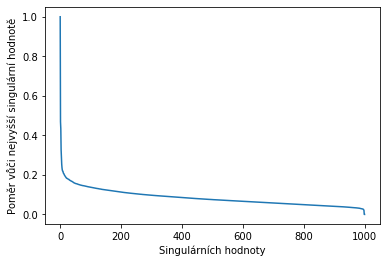

In [15]:
fig = plt.figure()
plt.plot(s_eigen_norm)
plt.xlabel('Singulárních hodnoty')
plt.ylabel('Poměr vůči nejvyšší singulární hodnotě')
fig.savefig('../report/singular_values.png')
plt.show()